## **EDA with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start doing EDA for retail shop sales.

## **EDA - Exploratory Data Analysis**
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

In [ ]:
# importing libraries for the prediction analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# importing the data set
df = pd.read_csv("/content/SampleSuperstore.csv")

print("Dataset imported successfully!")

df.head(10)

Dataset imported successfully!


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [ ]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### Checking the full summary information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### Checking the missing values

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Descriptive statistics about the dataset

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


### Shape of the dataset

In [ ]:
df.shape

(9994, 13)

### Columns inside the dataset

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Check the dataset for duplicate and dropping element

In [ ]:
df.duplicated().sum()


17

In [ ]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Function return Series with number of distinct observations over requested axis

In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Finding the correlation of dataset

In [ ]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


# **EDA Process**

In [ ]:
# drop Country
df = df.drop(['Country'], axis = 1)

In [ ]:
# drop Postal Code
df = df.drop(['Postal Code'], axis = 1)

### Comparing linear relationships between attributes using correlation coefficient generated with the help of correlation matrix



A correlation heatmap is used to list all the correlation coefficients in order to identify multicollinearity, in other words high intercorrelation above an absolute value of 0.5 between the a pair of attributes. For a pair of attributes with multicollinearity, one of them will be dropped since it would be redudant to include both of them with almost mirroring values. Another reason is to prevent overfitting.

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength. A positive correlation indicates that both features will change their values in the same direction, while a negative correlation indicates that both will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship.

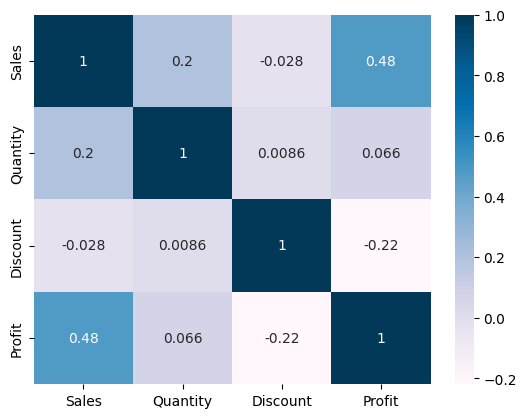

In [ ]:
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

In [ ]:
# total Sales
round(sum(df['Sales']), 2)

2297200.86

In [ ]:
# total Quantity sold
sum(df['Quantity'])

37873

In [ ]:
# total Profit
round(sum(df['Profit']), 2)

286397.02

## Sales and Profit for comparisons

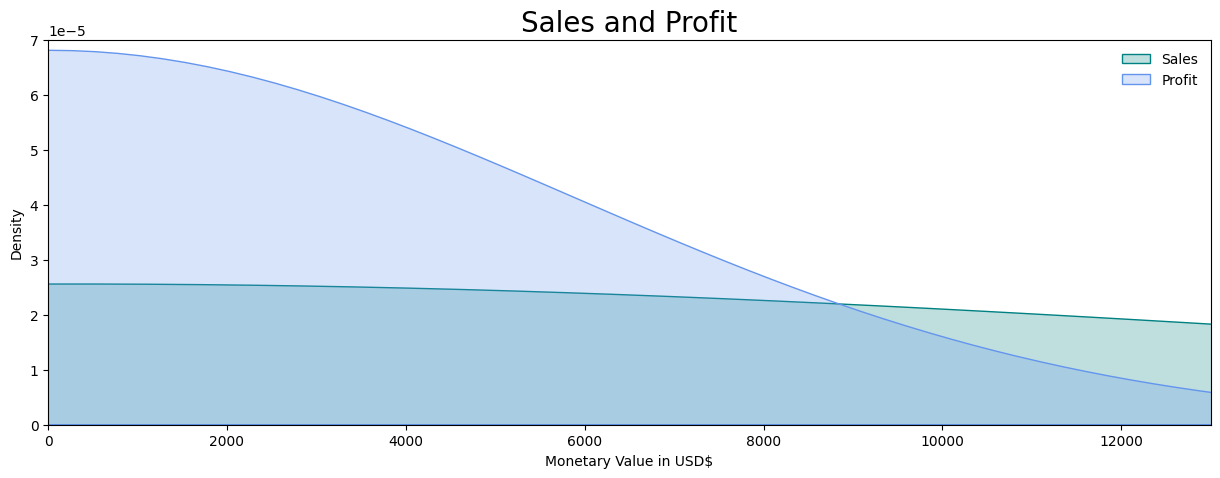

In [ ]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(df['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(df['Profit'], color = 'Cornflowerblue', label = 'Profit', shade = True, bw = 25)
plt.xlim([0, 13000])
plt.ylim([0, 0.00007])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False)
plt.show()

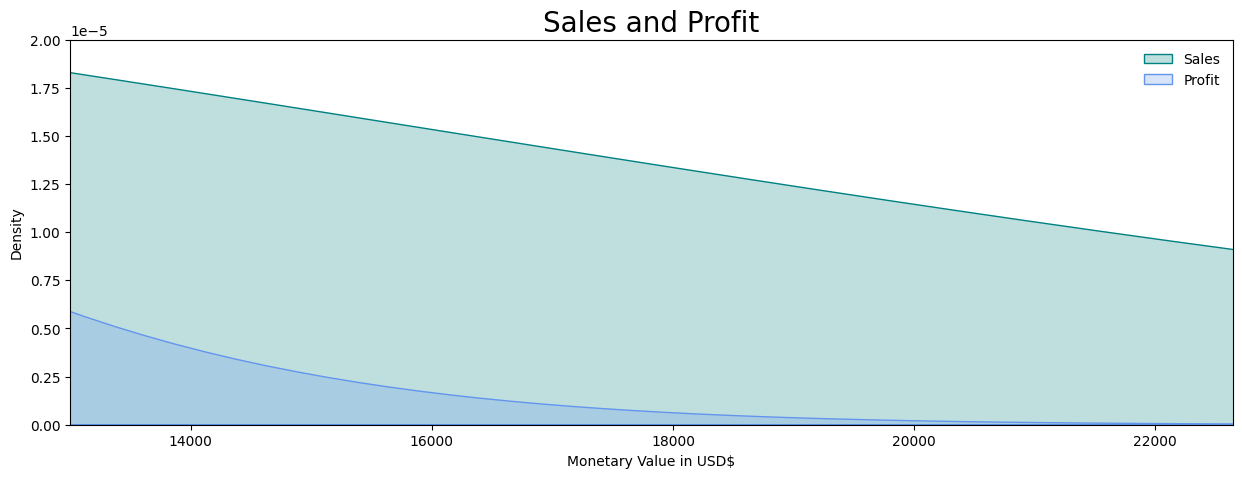

In [ ]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(df['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(df['Profit'], color = 'Cornflowerblue', label = 'Profit', shade = True, bw = 25)
plt.xlim([13000, 22640])
plt.ylim([0, 0.00002])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False)
plt.show()

Profits are mostly above sales, indicating good business. However, there are some instances where profits can be improved, such as at the USD$9,000 sales mark onwards.

The histogram density plots' highest points in the curves show the pattern of more sales transactions with less than USD$1k monetary value, and the highest profit is gained when the value is less than USD\$500.

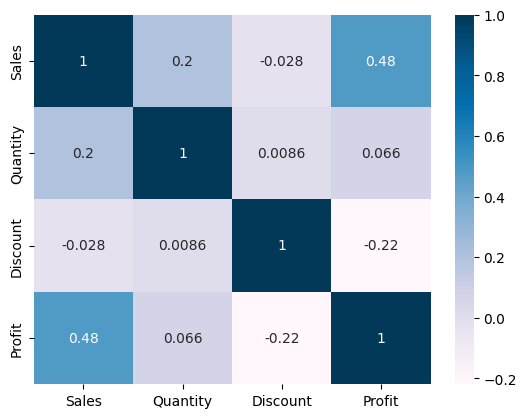

In [ ]:
# compare linear relationships between attributes using correlation coefficient generated using
    # correlation matrix
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

Moving on, scatter plot allows detailed observation of the overall spread and relationships between Sales and Profit for all transactions.

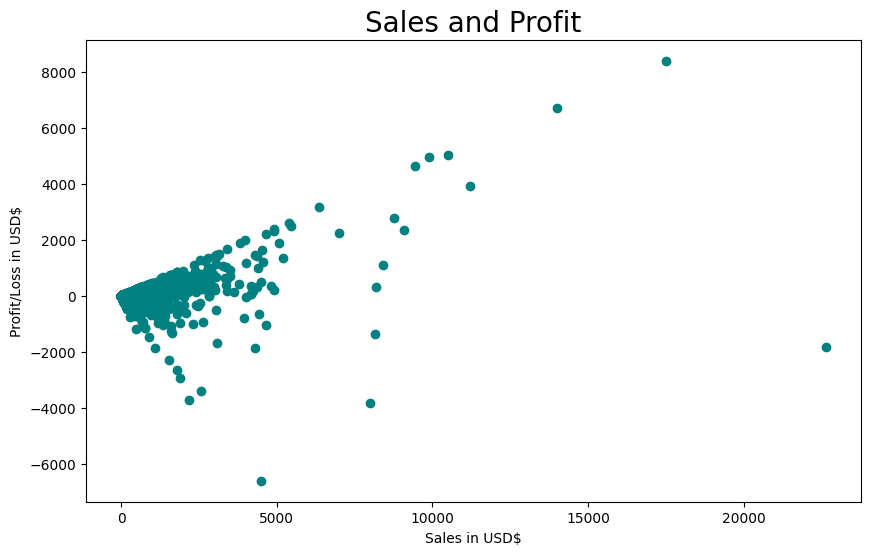

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
# scatterplot of Sales and Profit
ax.scatter(df["Sales"] , df["Profit"], color = 'Teal')
ax.set_xlabel('Sales in USD$')
ax.set_ylabel('Profit/Loss in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

<Axes: xlabel='Segment', ylabel='count'>

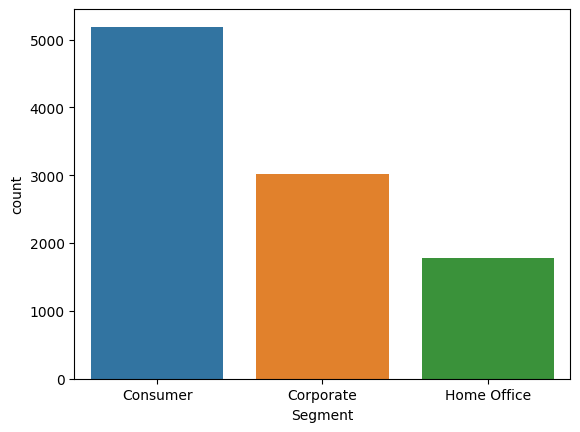

In [ ]:
sns.countplot(x=df['Segment'])

A state-wise analysis is carried out below.

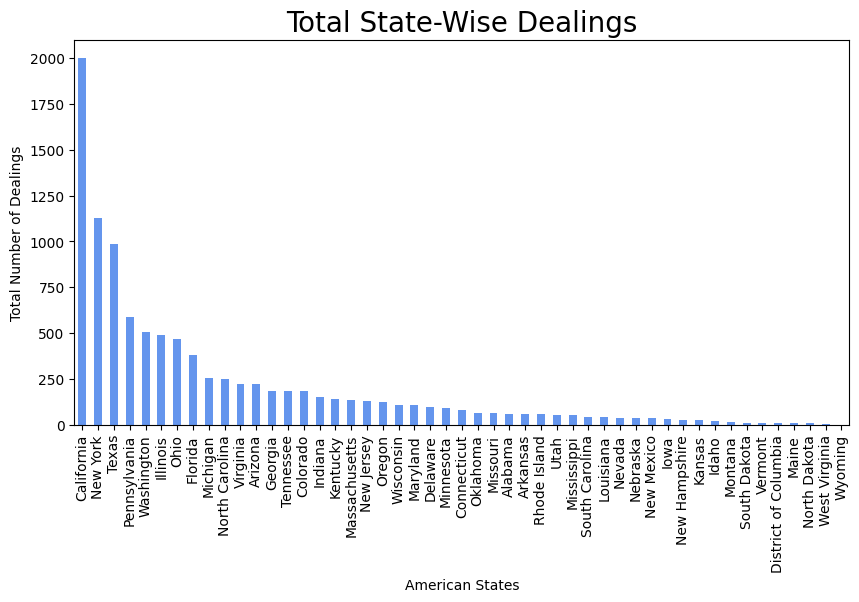

In [ ]:
# total dealings for each State
df_state_dealings = df.groupby('State')['Quantity'].count().sort_values(ascending = False).plot.bar(figsize = (10, 5),color = 'Cornflowerblue')
plt.ylabel('Total Number of Dealings')
plt.xlabel('American States')
plt.title('Total State-Wise Dealings', fontsize = 20)
plt.show()

Superstore has the notable highest dealings in the state of California, with almost 2K of total dealings.

With a big trailing gap, New York has the second highest dealings, with around 1,125 of total dealings.

Texas is third with almost 1K of total dealings.

The states of District of Columbia, Maine, North Dakota, West Virginia, and Wyoming have comparatively negligible dealings. Even if the Superstore outlets here are newly opened, marketing strategies should be improved in these areas as well as the states with less than 100 total dealings.

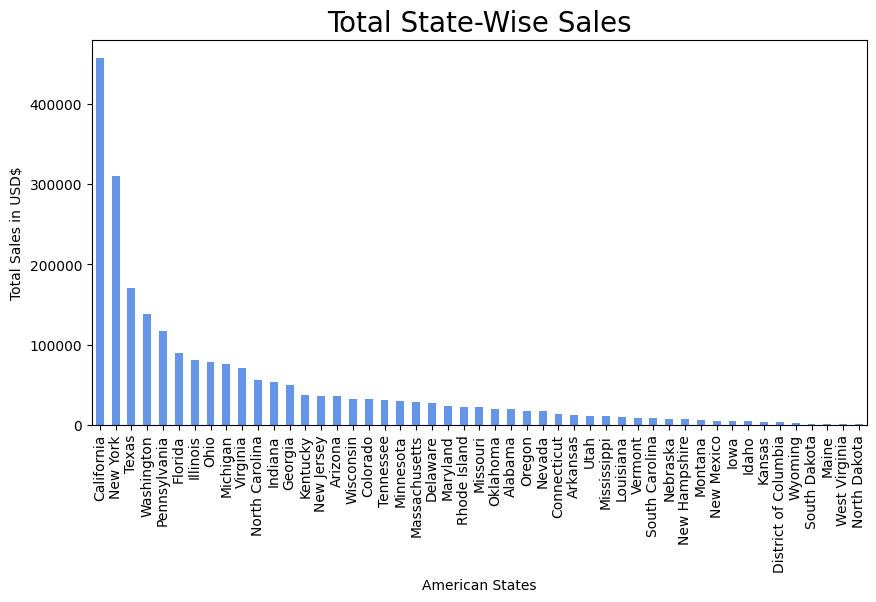

In [ ]:
# total Sales for each State
df_state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(figsize = (10, 5),
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Sales in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Sales', fontsize = 20)
plt.show()

The top 3 states here is same as for the previous analysis on number of dealings.

Superstore has a notable highest sales in the state of California, with over USD$450K of total sales.

With a big trailing gap, New York has the second highest sales, with over USD$300k of total sales.

With another big trailing gap, Texas is third with around USD$170K of total sales.

The states of Wyoming, South Dakota, Maine, West Virginia, and North Dakota have comparatively negligible sales. Even if the Superstore outlets here are newly opened, marketing strategies should be improved in these areas as well as the states with less than USD$20k total sales.

An analysis on state-wise profit/loss and the effect of discount on this is presented below.

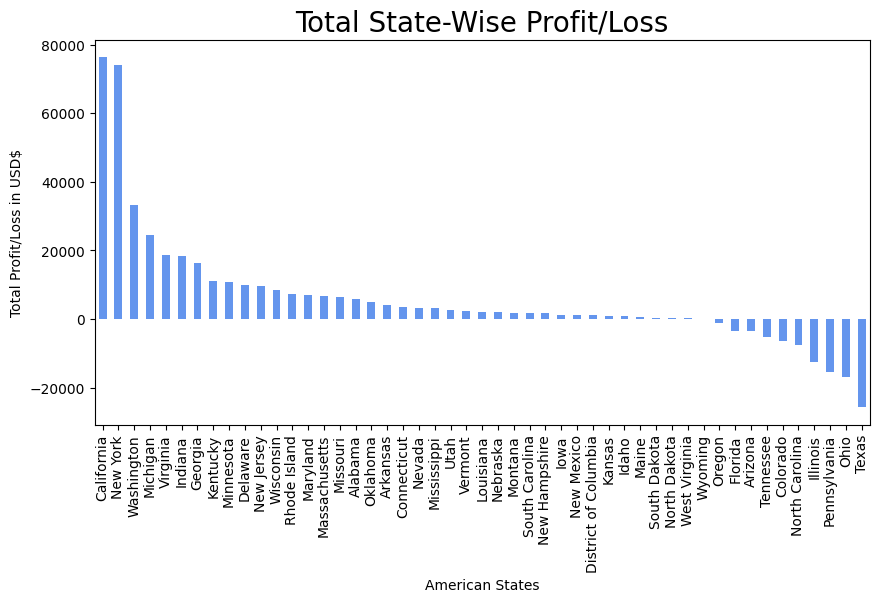

In [ ]:
# total Profit for each State
df_state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (10, 5),
                                                                                              color = 'Cornflowerblue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

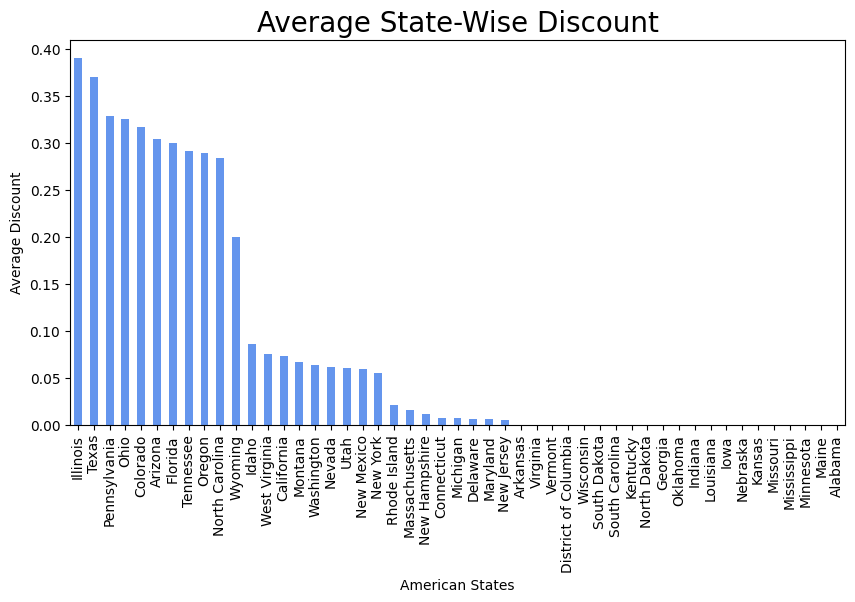

In [ ]:
# average Discount for each State
df_state_profit = df.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (10, 5),
                                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()

Diving deeper into the profits and losses from state-wise sales, a sample of 6 states are chosen based on the categories of high profit, medium profit, low profit, low loss, medium loss, and high loss. Crucial trends are identified, starting from the collection of answers to the following targeted questions.

Which products are popular in profit-making states?

Which products are commonly purchased in loss-bearing states?

Which product categories and sub-categories can be improved in order to increase profits?

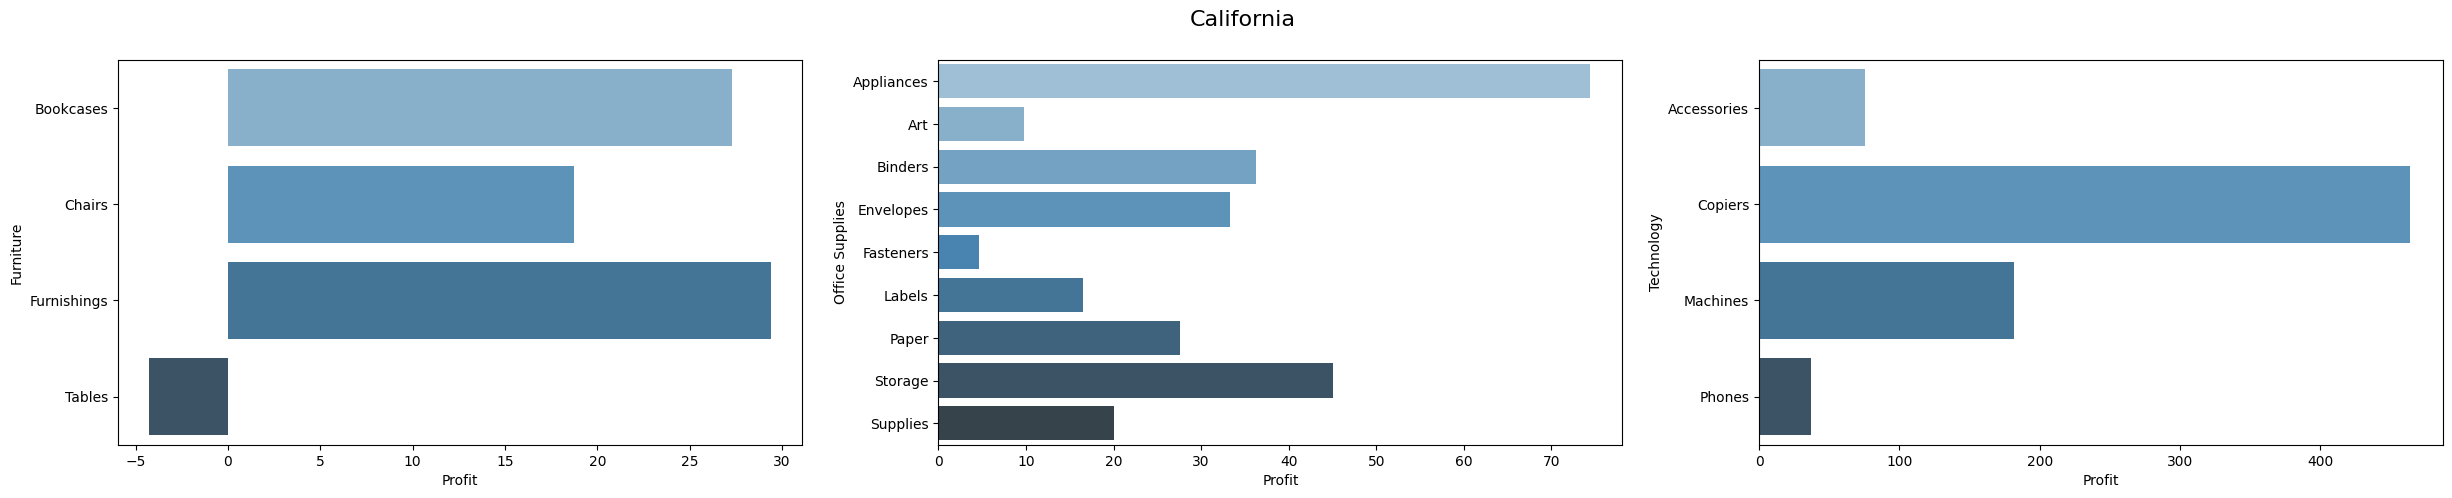

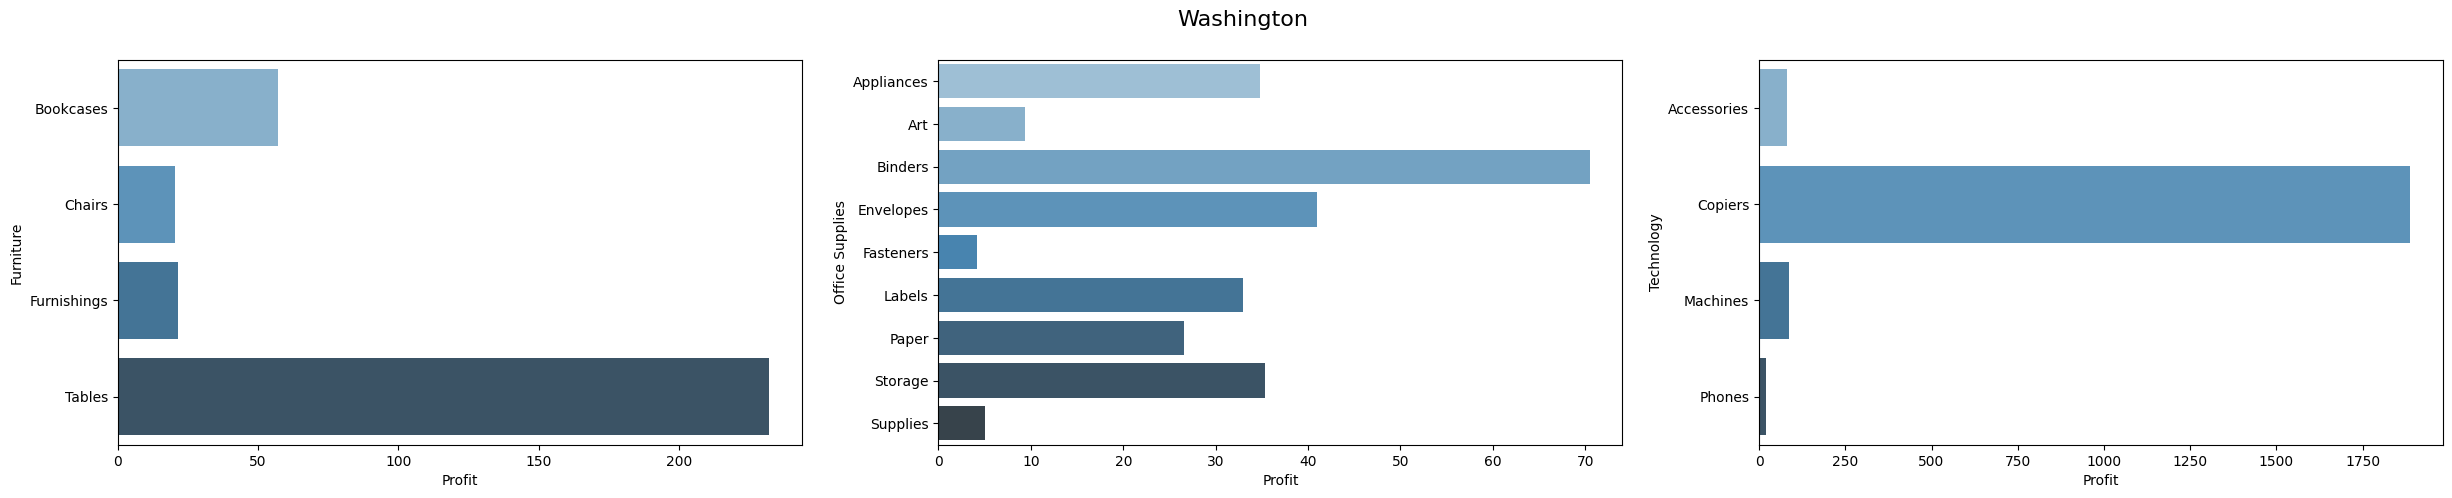

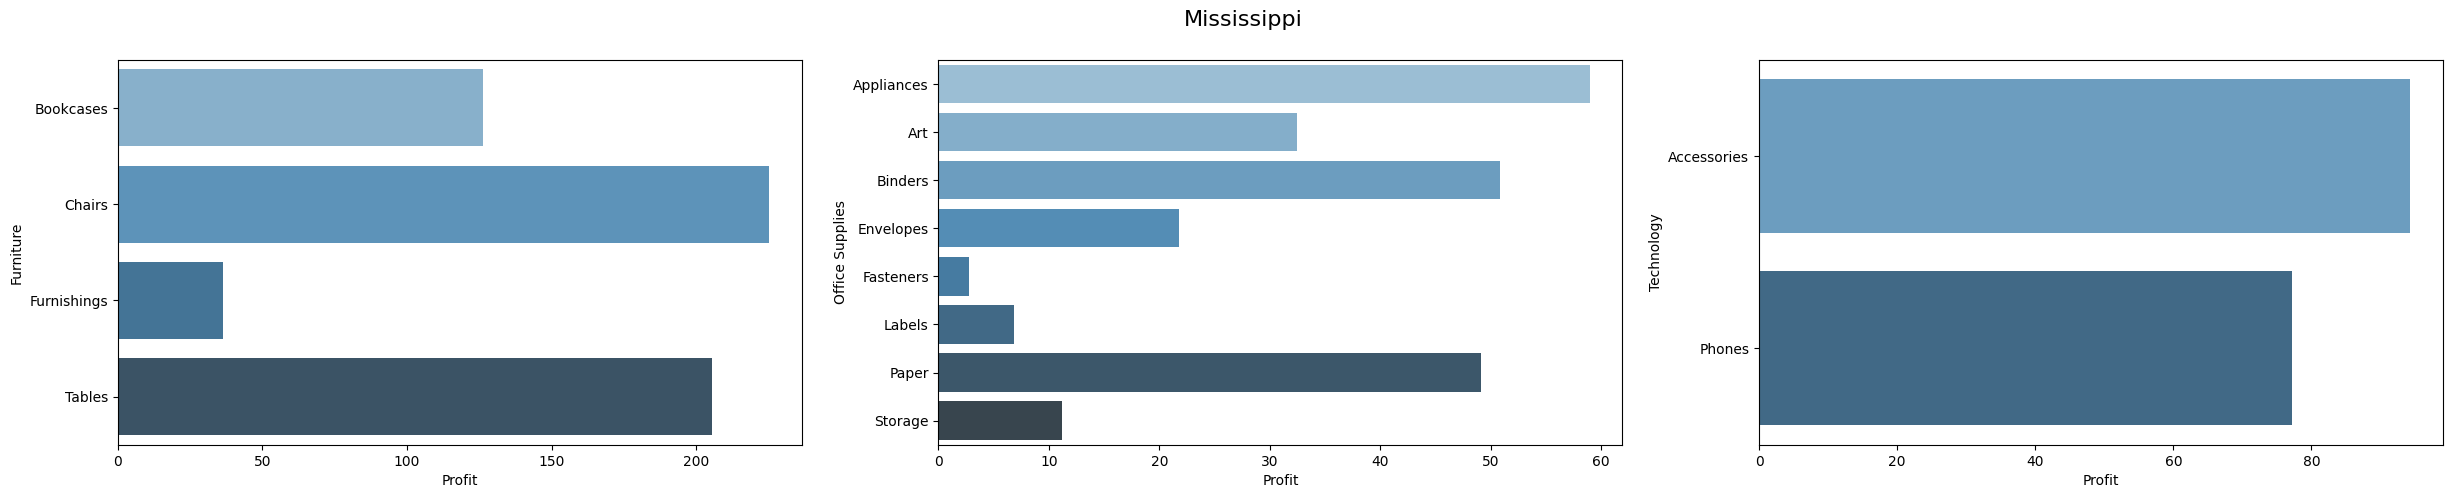

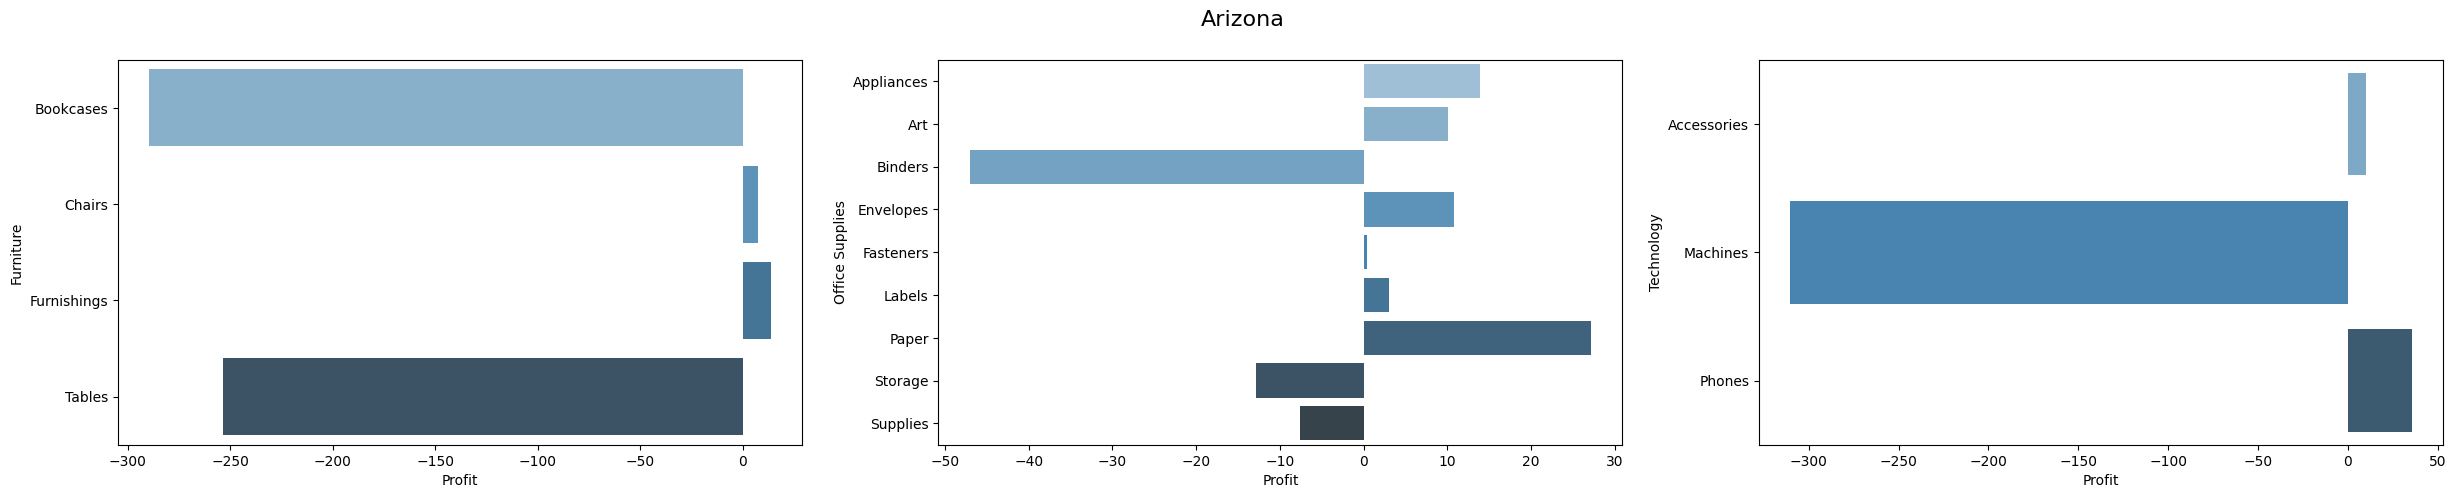

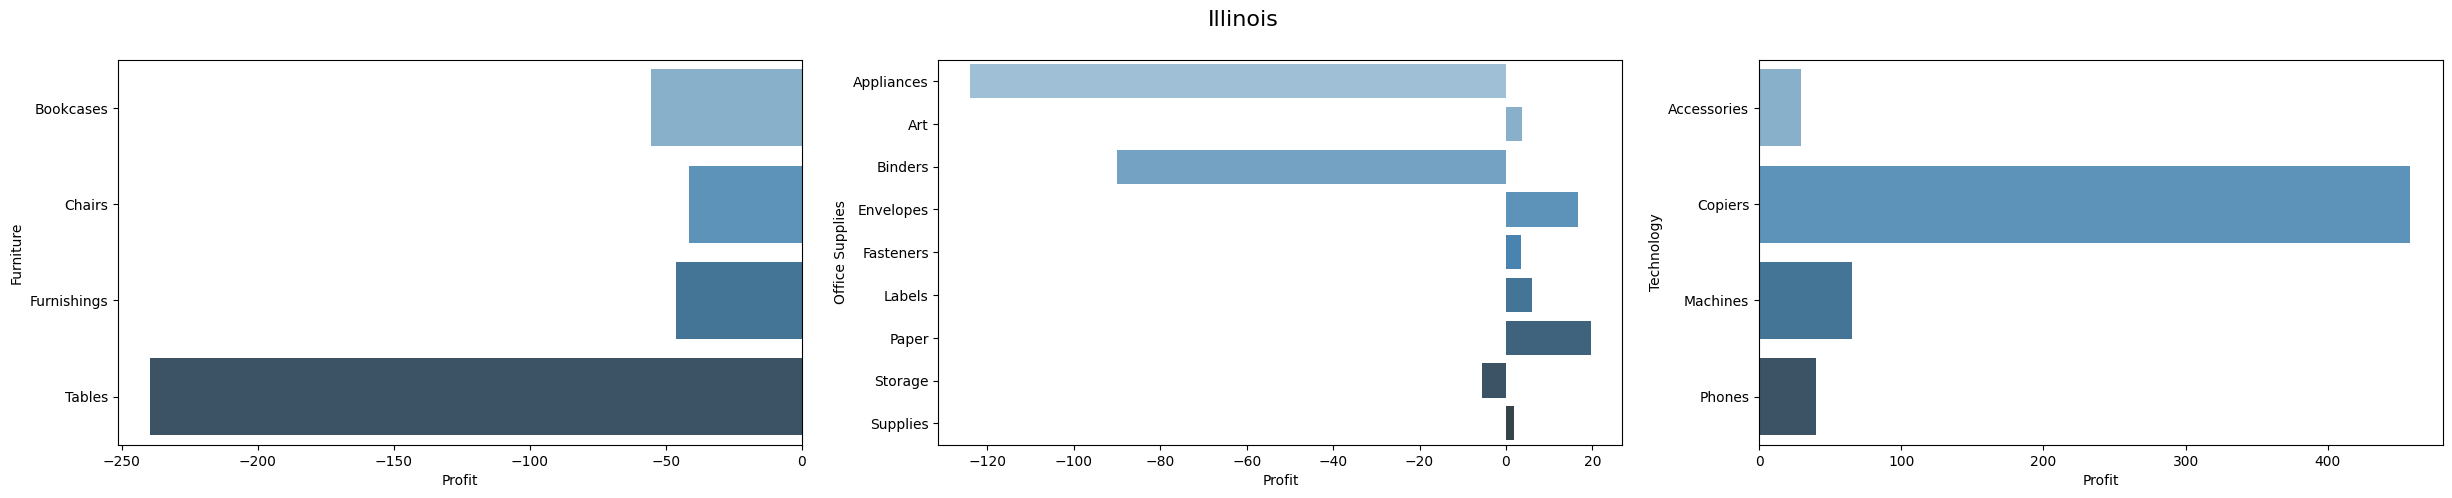

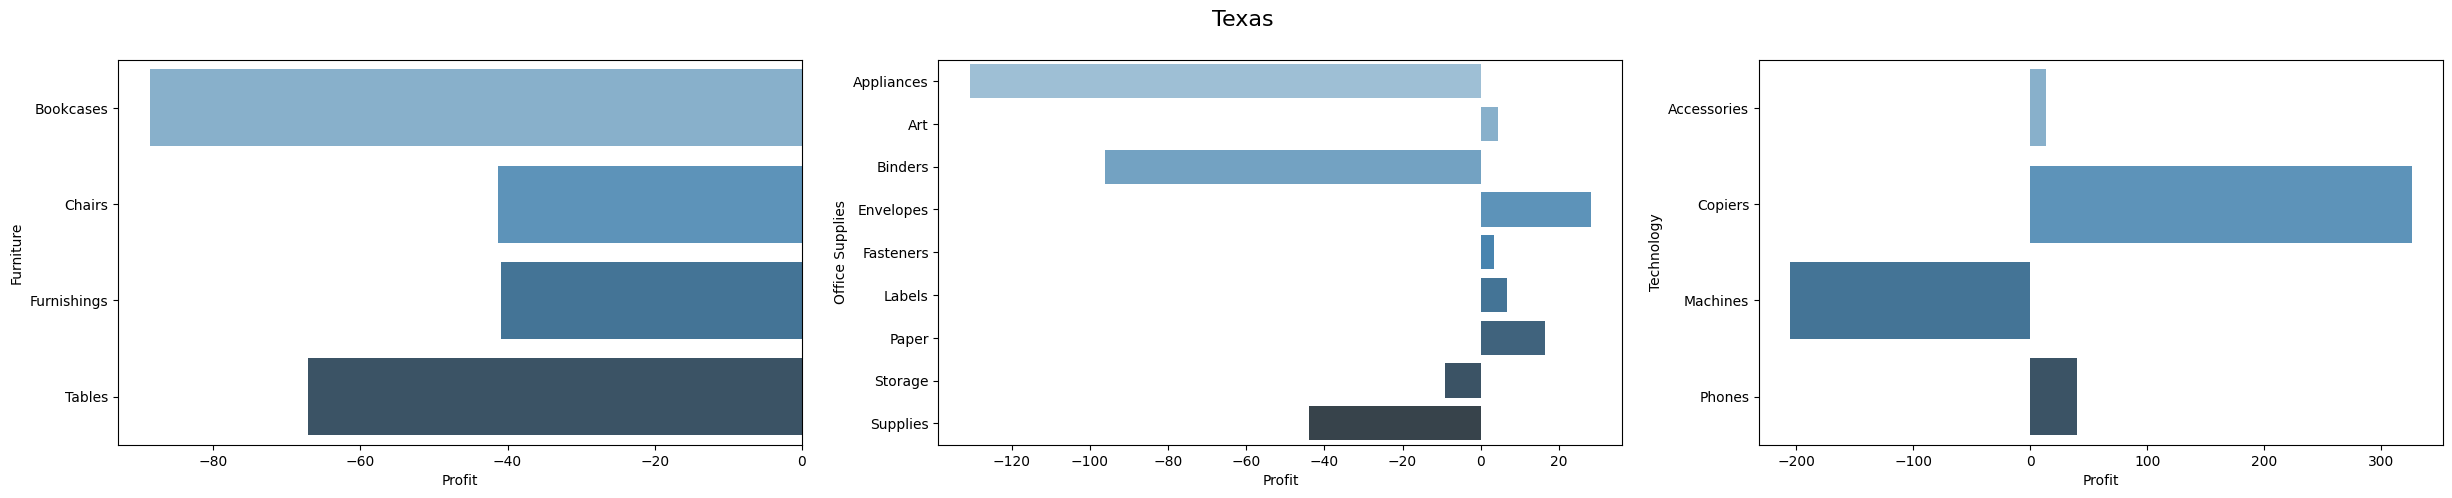

In [ ]:
def state_data_viewer(states):
# plot profit of product categories and sub-categories for the chosen states
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (30, 5))
        fig.suptitle(state, fontsize = 16)
        ax_index = 0
        # plot a chart for each category
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            # plot sub-categories in each category
            category_data = data.get_group(category).groupby(['Sub-Category']).mean()
            sns.barplot(x = category_data.Profit, y = category_data.index,
                        ax = ax[ax_index], palette = 'Blues_d')
            ax[ax_index].set_ylabel(category)
            ax_index += 1
# chosen States based on profit/loss categories
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Illinois', 'Texas']
state_data_viewer(states)

On a regional scale, the sales and profits are analysed below.

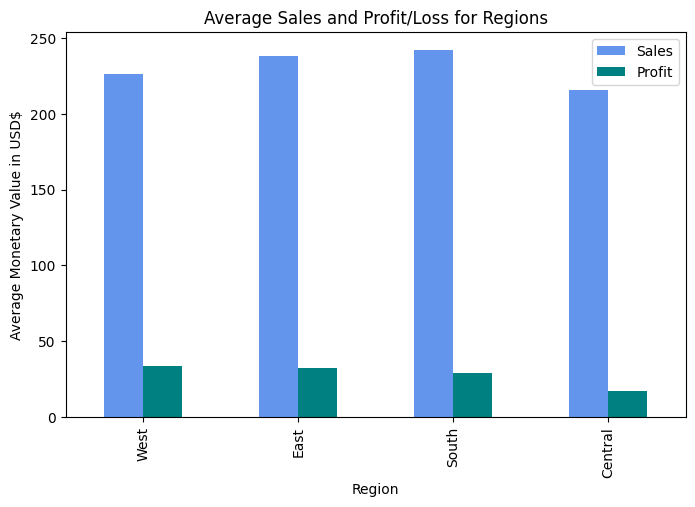

In [ ]:
# average Sales and profit/loss for Region
colors = ['Cornflowerblue', 'Teal']
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar',
                                                                             figsize = (8, 5),
                                                                             color = colors)

plt.ylabel('Average Monetary Value in USD$')
plt.xlabel('Region')
plt.title('Average Sales and Profit/Loss for Regions', fontsize = 12)
plt.show()

Thank You!
